## Import pdf file.

In [408]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()
root.attributes('-topmost', True)

pdf_file_path = filedialog.askopenfilename(
    parent=root,
    title='Select a pdf file',
    filetypes=[('pdf file', '.pdf')]
)


print(pdf_file_path)

C:/Users/savef/Downloads/CEPP66-09_1  PROJECT_NAME.pdf


In [409]:
from PIL import Image
import os
from pdf2image import convert_from_path

# Convert PDF to images
pdf_images = convert_from_path(pdf_file_path)

print(pdf_images)

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x2491B2D9450>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x2491B2DB390>]


## Pre processing

In [410]:
import cv2
import numpy as np

pre_pdf_images = []
for i, img in enumerate(pdf_images):
    im_gray = img.convert('L')
    
    kernel = np.ones((3, 3), np.uint8)
    conv_img = np.array(im_gray)
    
    # please add your own image pre-processing code here
    
    # conv_img = cv2.erode(conv_img, kernel, iterations=1)
    # conv_img = cv2.dilate(conv_img, kernel, iterations=1)
    
    pre_pdf_images.append(conv_img)
    
    

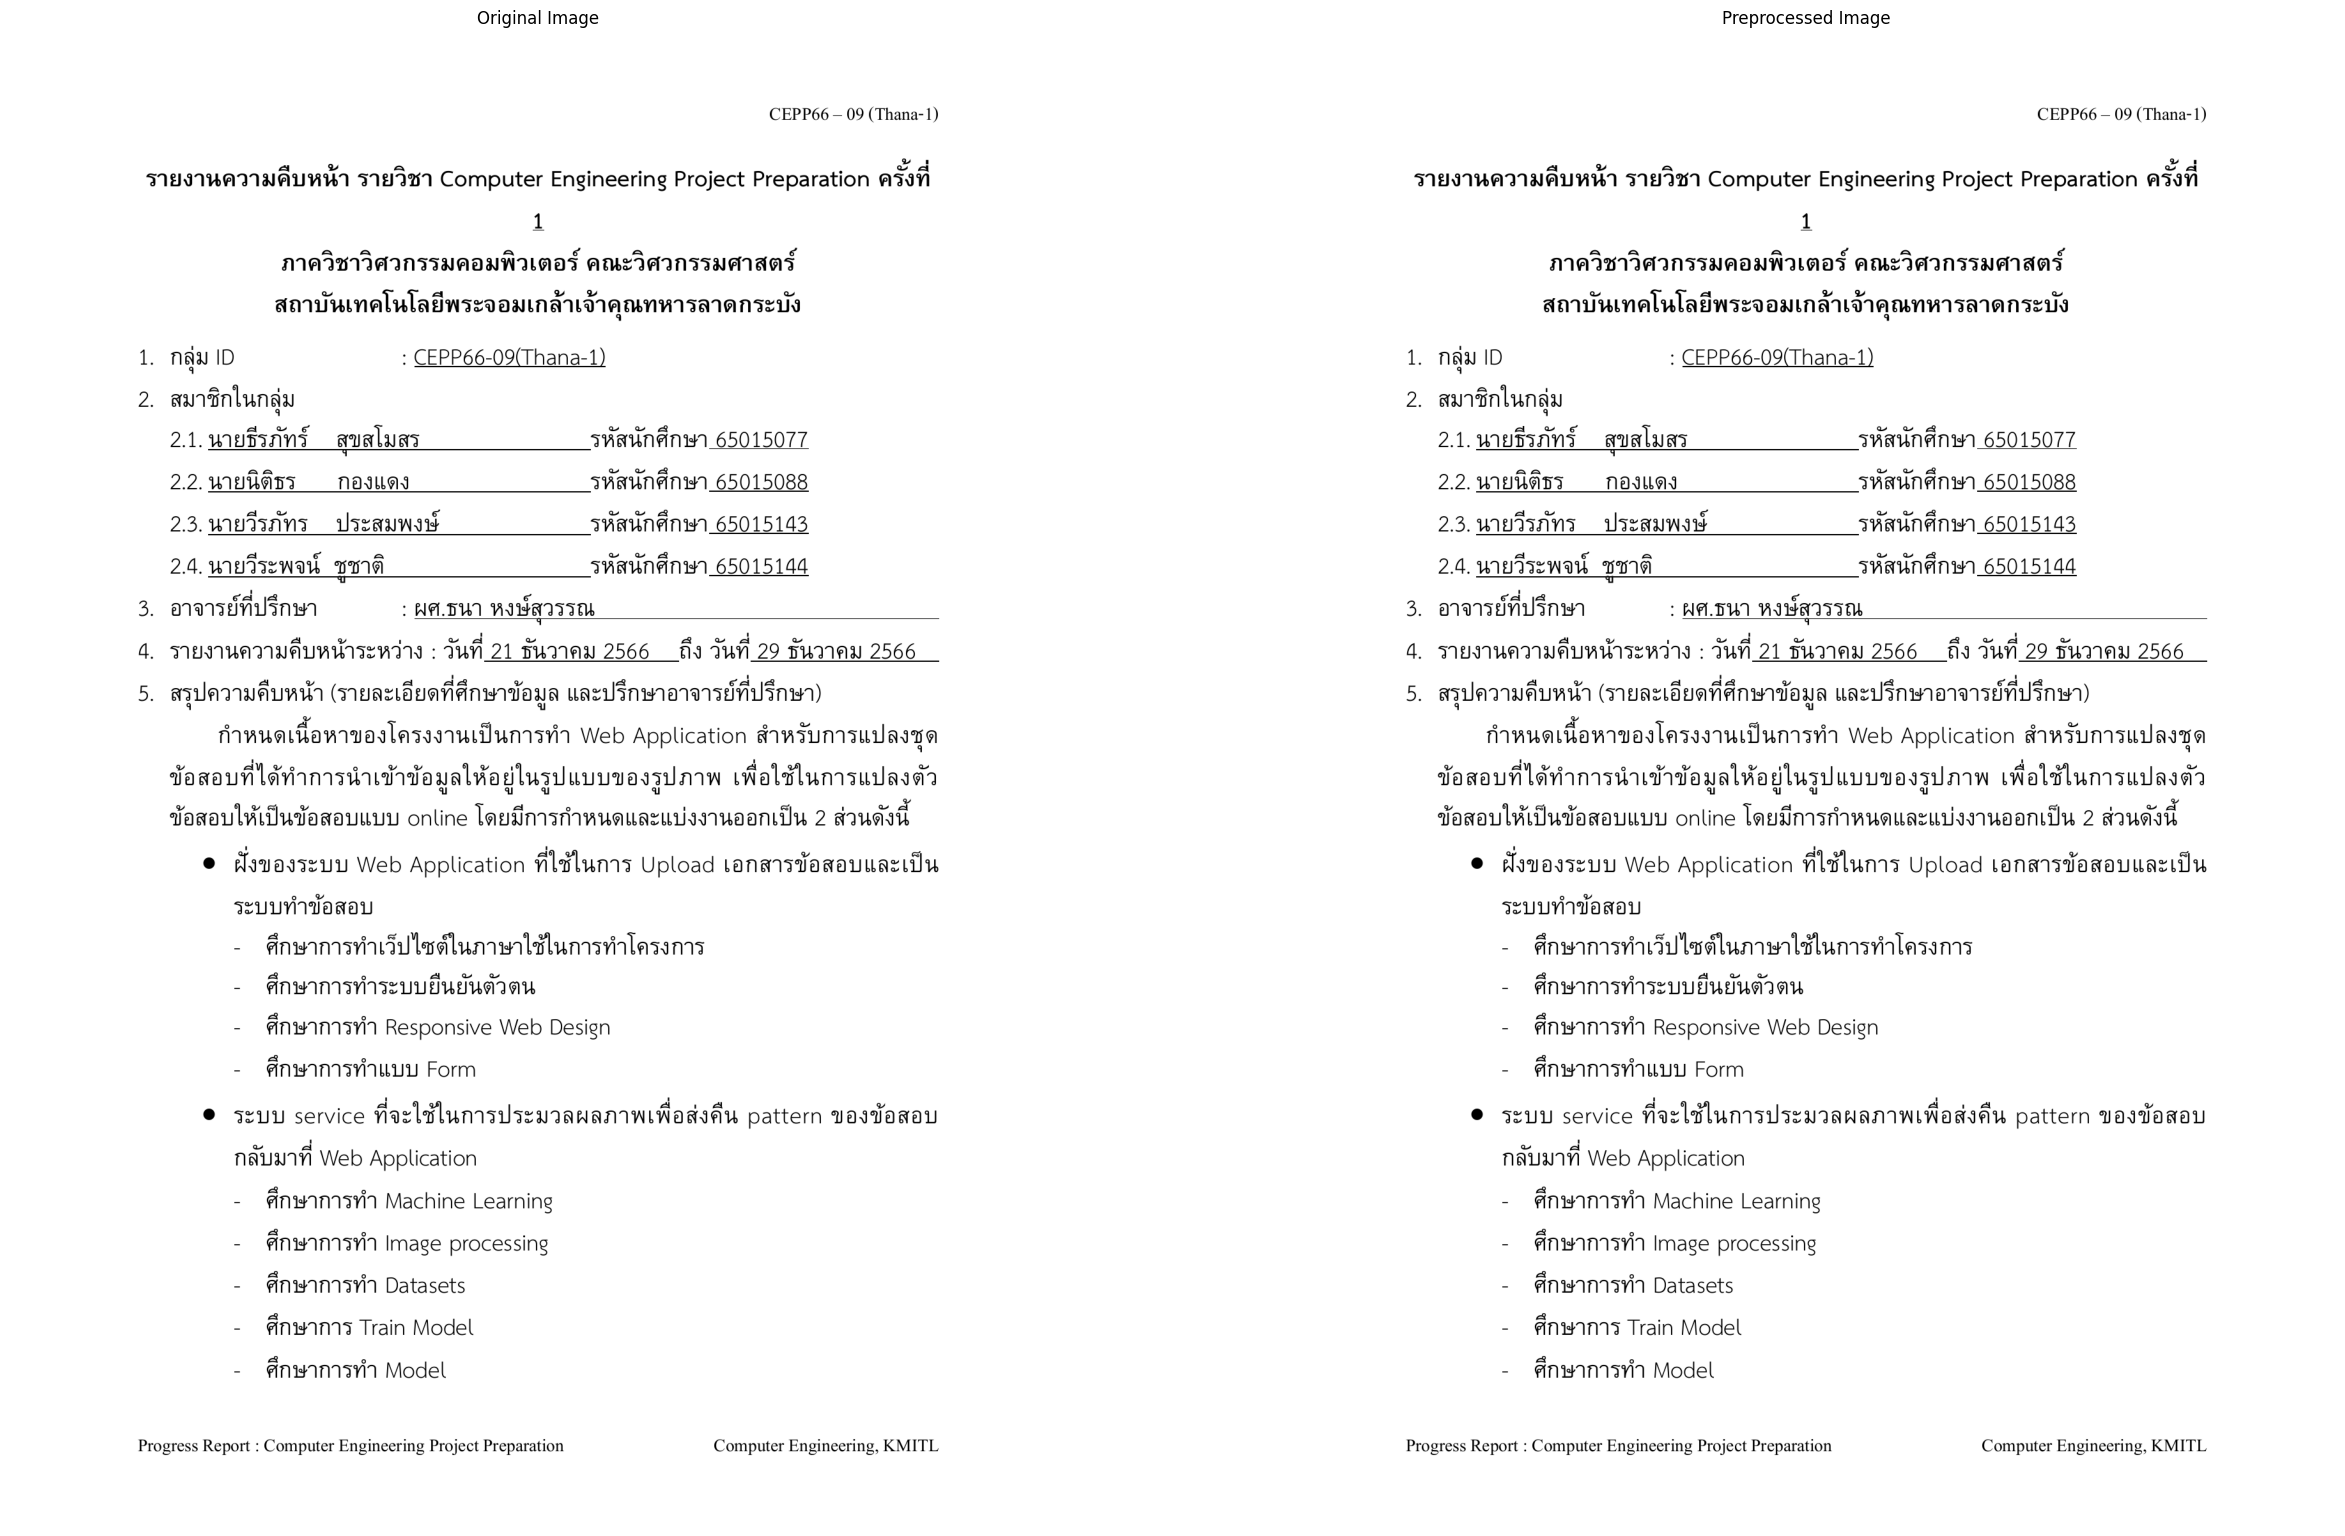

In [411]:
from matplotlib import pyplot as plt
plt.figure(figsize=(30, 30))

#show the first original image
plt.subplot(1, 2, 1)
plt.imshow(pdf_images[0])
plt.title('Original Image')
plt.axis('off')

#show the first processed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(pre_pdf_images[0], cv2.COLOR_BGR2RGB))
plt.title('Preprocessed Image')
plt.axis('off')

plt.show()

In [412]:
charactors = {
    ':': 'colon',
    ';': 'semicolon',
    '!': 'exclamation',
    '?': 'question',
    '.': 'period',
    ',': 'comma',
    '(': 'parenthesis_open',
    ')': 'parenthesis_close',
    '[': 'bracket_open',
    ']': 'bracket_close',
    '{': 'brace_open',
    '}': 'brace_close',
    '-': 'hyphen',
    '+': 'plus',
    '=': 'equal',
    '/': 'slash',
    '\\': 'backslash',
    '*': 'asterisk',
    '&': 'ampersand',
    '%': 'percent',
    '$': 'dollar',
    '#': 'sharp',
    '@': 'at',
    '_': 'underscore',
    '|': 'vertical_bar',
    '"': 'double_quotation',
    "'": 'quotation',
    '~': 'tilde',
    '`': 'backquote',
    '^': 'caret',
    '<': 'less_than',
    '>': 'greater_than',
    '่': 'thai_mai_ek',
    '้': 'thai_mai_tho',
    '๊': 'thai_mai_tri',
    '๋': 'thai_mai_chattawa',
    '์': 'thai_karan',
    'ิ': 'thai_sara_i',
    'ี': 'thai_sara_ii',
    'ึ': 'thai_sara_ue',
    'ื': 'thai_sara_uee',
    'ั': 'thai_sara_a',
    'ู': 'thai_sara_u',
    'ุ': 'thai_sara_uu',
    'ฺ': 'thai_phinthu',
    '“': 'thai_unyapra_open',
    '”': 'thai_unyapra_close',
    '็': 'thai_mai_taikhu',
    'ํ': 'thai_nikkhahit'
    # 'ๆ': 'thai_maiyamok',
    # 'ฯ': 'thai_paiyannoi',
    # 'เ': 'thai_sara_e',
    # 'แ': 'thai_sara_ee',
    # 'โ': 'thai_sara_oo',
    # 'ใ': 'thai_sara_ai_maimuan',
    # 'ไ': 'thai_sara_ai_maimalai',
    # 'ๅ': 'thai_leksun',
    # 'ฤ': 'thai_rue',
    # 'ฦ': 'thai_lue',
}

## Get images

In [413]:
import tesserocr
print(tesserocr.tesseract_version())
print(tesserocr.get_languages())

tesseract 5.2.0
 leptonica-1.78.0 (Apr  9 2021, 08:55:04) [MSC v.1916 LIB Release x64]
  libjpeg 9d : libpng 1.6.39 : libtiff 4.4.0 : zlib 1.2.13
('C:\\Users\\savef\\anaconda3\\envs\\ext\\share\\tessdata/', ['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'equ', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frk', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'kor_vert', 'lao', 'lat', 'lav', 'lit', 'ltz', 'mal', 'mar', 'mkd', 'mlt', 'mon', 'mri', 'msa', 'mya', 'nep', 'nld', 'nor', 'oci', 'ori', 'osd', 'pan', 'pol', 'por', 'pus', 'que', 'ron', 'rus', 'san', 'sin', 'slk', 'slv', 'snd', 'spa', 'spa_old', 'sqi', 'srp', 'srp_latn',

In [414]:
from tesserocr import PyTessBaseAPI, PSM

char_folder = 'char'
if not os.path.exists(char_folder):
    os.makedirs(char_folder)

ocrlang = 'tha+eng' # can be multiple languages
with PyTessBaseAPI(lang=ocrlang, path='./models/') as middleware:
    middleware.SetPageSegMode(PSM.AUTO_OSD)
    middleware.SetVariable('preserve_interword_spaces', '1')
    
    for i, img in enumerate(pre_pdf_images):
        temp = Image.fromarray(img)
        middleware.SetImage(temp)
        
        # get bounding box per line
        boxes = middleware.GetComponentImages(tesserocr.RIL.TEXTLINE, True)
        
        # get bounding box per character
        # boxes = middleware.GetComponentImages(tesserocr.RIL.SYMBOL, True)
        
        print('Found {} textline image components.'.format(len(boxes)))
        
        # crop character from textline per character and save to folder
        
        for j, (im, box, _, _) in enumerate(boxes):
            middleware.SetRectangle(box['x'], box['y'], box['w'], box['h'])
            ocrResult = middleware.GetUTF8Text().strip()
            print(ocrResult)
            print(box)
            print('---------------------------------------------')
            
            char_width = int(box['w'] / len(ocrResult))
            char_x_start = int(k * char_width)
            char_x_end = int((k + 1) * char_width)
            
            for k, char in enumerate(ocrResult):
                if char not in [' ', '\n']:
                    
                    ch_folder = ''
                    if char in charactors:
                        ch_folder = '{}/{}'.format(char_folder, charactors[char])
                        char = charactors[char]
                    else:
                        ch_folder = '{}/{}'.format(char_folder, char)
                    if not os.path.exists(ch_folder):
                        os.makedirs(ch_folder)
                    
                    textline_image = temp.crop((box['x'], box['y'], box['x'] + box['w'], box['y'] + box['h']))
                    
                    char_image = textline_image.crop((char_x_start, 0, char_x_end, box['h']))
                    
                    char_image.save(os.path.join(ch_folder, '{}_{}.png'.format(char, k)))
            

Found 1 textline image components.
=
{'x': 201, 'y': 119, 'w': 1253, 'h': 2109}
---------------------------------------------
Found 1 textline image components.
E
{'x': 201, 'y': 119, 'w': 1252, 'h': 2109}
---------------------------------------------
